MNIST Classification task is the "hello world" of Computer Vision. The task is to identify (or classify) the greyscale images of hand-written digits. The dataset can be easily loaded using Keras.

In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape
print("Number of samples in training data = {}.\nDimensions of each sample are {}X{}".format(n_train, height, width))
print("Number of samples in test data = {}".format(n_test))

Number of samples in training data = 60000.
Dimensions of each sample are 28X28
Number of samples in test data = 10000


In [3]:
print(X_train.shape)
print(X_train[0].shape)

(60000, 28, 28)
(28, 28)


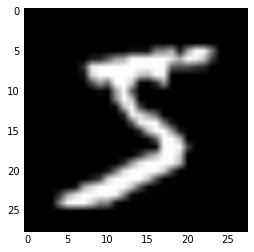

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
print(y_train)

[5 0 4 ..., 5 6 8]


We need to process the data before feeding to Keras. 

* Reshape data. Keras layers for 2-d convolution expects another dimension corresponding to pixel. For greyscale image, we have only one pixel dimension. For RGB, there would be 3 pixel dimensions.
* Normalize image data so that all pixel values are in range [0, 1] instead of [0, 255]. 
* Transform output values to be one-hot vectors instead of single values.

In [6]:
from keras.utils.np_utils import to_categorical
from keras import backend as K

# Reshaping data

# this if condition is needed because the input shape is specified differently for theano and tensorflow backend.
if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(n_train, 1, height, width).astype('float32')
    X_test = X_test.reshape(n_test, 1, height, width).astype('float32')
    input_shape = (1, height, width)
else:
    X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
    X_test = X_test.reshape(n_test, height, width, 1).astype('float32')
    input_shape = (height, width, 1)
    

# Normalizing data
X_train /= 255
X_test /= 255

# Transforming output variables
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [7]:
print(X_train.shape)
print(X_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [8]:
print(y_train)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


In [9]:
print(y_train[0])
print(y_train[1])

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


We will create a sequential Keras model where different layers would be added in sequence.

In [10]:
from keras.models import Sequential
model = Sequential()

Architecture:
 * Convolution layers
     * Convolution layer would have 32 feature maps.
     * Each feature map will be of size 5x5.
     * This will be followed by RELU activation.
 * Pooling layer
     * Pool Size of 2x2
 * Regularization layer (Dropout)
     * Exclude 25% of neurons in the layer to reduce overfitting.
 * Flatten layer to convert the matrix data to vectors.
 * Fully connected (dense) layer
     * 128 neurons and RELU activation.
 * Regularization layer (Dropout)
     * Exclude 25% of neurons in the layer to reduce overfitting.
 * Fully connected (dense) layer
     * 10 neurons (1 for each class)
     * Softmax classifier convolution filters).

In [11]:
from keras.layers import Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense

# Convolution Layer

model.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 5, 5, activation='relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Regularization Layer
model.add(Dropout(0.25))

# Flatten Layer
model.add(Flatten())

# Fully Connected
model.add(Dense(128))
model.add(Activation('relu'))

# Regularization Layer
model.add(Dropout(0.5))

# Fully Connected with softmax
model.add(Dense(n_classes))
model.add(Activation('softmax'))

Specify the loss function, the optimizer to use and the metric to track.

In [12]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Now we can start the training. For demo purpose, we will train it only for 2 epochs. Feel free to train for more epochs.

In [13]:
model.fit(X_train, y_train, batch_size=128, nb_epoch=2, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 322s - loss: 0.2527 - acc: 0.9235 - val_loss: 0.0543 - val_acc: 0.9831
Epoch 2/2
60000/60000 [==============================] - 331s - loss: 0.0902 - acc: 0.9733 - val_loss: 0.0378 - val_acc: 0.9874


In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

10000/10000 [==============================] - 17s    
Loss: 0.0378334802061
Accuracy: 0.9874
